In [1]:
%matplotlib inline


# Comparing different hierarchical linkage methods on toy datasets

This example shows characteristics of different linkage
methods for hierarchical clustering on datasets that are
"interesting" but still in 2D.

The main observations to make are:

- single linkage is fast, and can perform well on
  non-globular data, but it performs poorly in the
  presence of noise.
- average and complete linkage perform well on
  cleanly separated globular clusters, but have mixed
  results otherwise.
- Ward is the most effective method for noisy data.

While these examples give some intuition about the
algorithms, this intuition might not apply to very high
dimensional data.


In [2]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

Generate datasets. We choose the size big enough to see the scalability
of the algorithms, but not too big to avoid too long running times



In [34]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
second_noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.8, 1.5, 1.5], random_state=random_state
)

In [4]:
second_moon_pos = second_noisy_moons[0]
second_moon_labels = second_noisy_moons[1]
len_second_moon = len(second_moon_labels)

both_moon_pos = noisy_moons[0]
both_moon_labels = noisy_moons[1]

for idx_second_moon in range(len_second_moon):
    if second_moon_labels[idx_second_moon] == 1:
        both_moon_labels = np.append(both_moon_labels, 2)
        both_moon_pos = np.append(both_moon_pos, [[second_moon_pos[idx_second_moon][1] - 1.5, second_moon_pos[idx_second_moon][0] - 0.7]], axis = 0)
both_moons = (both_moon_pos, both_moon_labels)

Run the clustering and plot



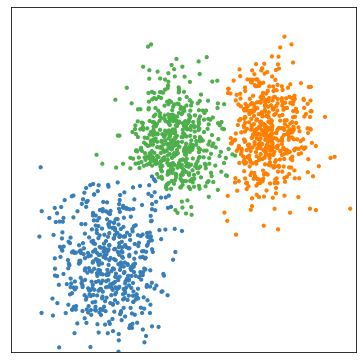

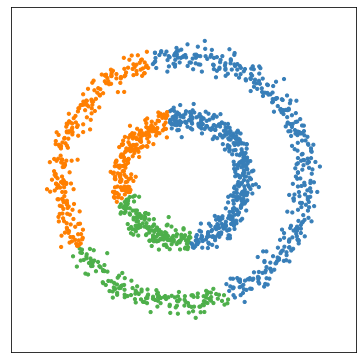

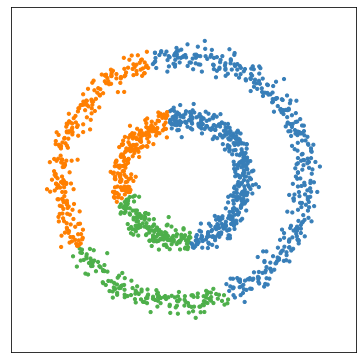

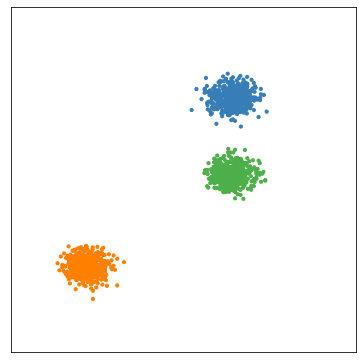

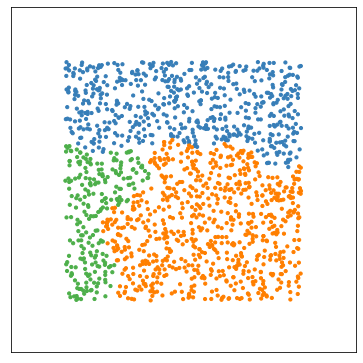

In [35]:
# Set up cluster parameters

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters":3}

datasets_list = [
    #(noisy_moons, {"n_clusters": 2}),
    #(both_moons, {"n_clusters": 3}),
    (varied, {"n_neighbors": 2}),
    #(both_moons, {"n_clusters": 1}),
    (noisy_circles, {"n_clusters": 3}),
    (noisy_circles, {"n_clusters": 3}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
    plt.figure(figsize=(5,5))
    plt.subplots_adjust(
        left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
    )

    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    
    clustering_algorithms = (
        ("Complete Linkage", complete),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plot_num += 1

        plt.show()

In [13]:
help(varied)

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |